# Synthetic Accesibility Scores for COVID submissions

In [93]:
import numpy as np
import pandas as pd

In [94]:
import PIL #needed for IPythonConsole

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem

In [95]:
from os import listdir
from os.path import isfile, join
plans_path = './covid_synthesis_plans/'
html_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [96]:
syn_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1USA9yJ7CuCjQkqkqIQ2oEBCE-uhM6kLWWXUhBBiMo_c/export?gid=0&format=csv')
syn_df.head()

,SMILES,CID,creator,rationale,fragments,real_space,SCR,BB,link,covalent_frag,SA_score,avg_sa_score,MATT Comments,ALPHA comments
0,Clc1ccc(Cn2c(CN3CCCC3)nc3ccccc32)cc1,AME-NAT-624-1,"Ameya D Bendre, National centre for cell science",The molecule is clemizole (Not newly designed ...,x0072,FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/624...,False,1.829810,1.829810,NaN,NaN
1,N#Cc1cccc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7-1,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",Z195739680,Z195739680,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,1.836199,1.842151,NaN,NaN
2,O=C(Nc1cccnc1)Nc1cc(Cl)cc(Cl)c1,WAR-XCH-eb7-3,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,1.857217,1.842151,NaN,NaN
3,N#Cc1cc(Cl)cc(NC(=O)Nc2cccnc2)c1,WAR-XCH-eb7-2,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,2.052798,1.842151,NaN,NaN
4,O=C(Nc1cccnc1)Nc1cc(O)cc(Cl)c1,WAR-XCH-eb7-4,"Warren, XChem - Diamond Light Source",Combining fragments X0305 and X0434 by eye,"x0305,x0434",FALSE,FALSE,FALSE,https://covid.postera.ai/covid/submissions/eb7...,False,1.999026,1.842151,NaN,NaN


In [97]:
smi_list = []
mw_list = []
cids_list = []
links_list = []
html_file_list = []

available_list = []
probs_list = []
sms = []

for html_file in html_files:
    cid = html_file.split('.html')[0].split('_')[0]
    cids_list.append(cid)
    smi = list(syn_df.loc[syn_df['CID']==cid]['SMILES'])[0]
    smi_list.append(smi)
    links_list.append(list(syn_df.loc[syn_df['CID']==cid]['link'])[0])
    
    mw_list.append(Chem.Descriptors.ExactMolWt(Chem.MolFromSmiles(smi)))
    
    html_file_list.append(f'https://htmlpreview.github.io/?https://github.com/mc-robinson/sa_html_viewer/blob/master/covid_synthesis_plans/{html_file}')
    
    with open('./covid_synthesis_plans/' + html_file, 'r') as f:
        data = f.readlines()
        
    all_available = True
    mol_ids = []
    for line in data:
        mol_ids = []
        if 'OVERALL PROB:' in line:
            prob = line.split('</p>')[0].split('OVERALL PROB:')[-1].strip()
            probs_list.append(float(prob))
        if ' = ' in line:
            sublines = line.split("</p>")
            for subline in sublines:
                if ((len(subline) >0) and ('Stock' not in subline) and ('Reactions' not in subline)
                    and ('*' not in subline)):
                    mol_id = subline.split(' = ')[-1]
                            
                    if 'EN' not in mol_id:
                        all_nums = True
                        for char in mol_id:
                            if char.isalpha():
                                all_nums = False
                        if all_nums:
                            all_available = False
                    else:
                        mol_ids.append(mol_id)
    available_list.append(all_available)
    sms.append(mol_ids)

In [98]:
sa_df = pd.DataFrame({
    'SMILES': smi_list,
    'MW': mw_list,
    'SCORE': probs_list,
    'BB': sms,
    'CID': cids_list,
    'LINK': links_list,
    'ROUTE': html_file_list
})

In [99]:
from rdkit.Chem import PandasTools

In [100]:
sa_df.head()

,SMILES,MW,SCORE,BB,CID,LINK,ROUTE
0,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,0.979,"[EN300-17271, EN300-21243]",ALE-HEI-f28-4,https://covid.postera.ai/covid/submissions/f28...,https://htmlpreview.github.io/?https://github....
1,O=C(Cc1ccccc1)N(Cc1cccnc1)C(=O)NC1CC1,309.147727,0.812,"[EN300-15619, EN300-18992]",MIC-SGC-657-1,https://covid.postera.ai/covid/submissions/657...,https://htmlpreview.github.io/?https://github....
2,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,0.973,[EN300-51191],CHR-SOS-6c4-11,https://covid.postera.ai/covid/submissions/6c4...,https://htmlpreview.github.io/?https://github....
3,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,0.681,[EN300-51191],GAB-REV-70c-3,https://covid.postera.ai/covid/submissions/70c...,https://htmlpreview.github.io/?https://github....
4,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.940,"[EN300-31943, EN300-42287]",GIA-UNK-eaa-2,https://covid.postera.ai/covid/submissions/eaa...,https://htmlpreview.github.io/?https://github....


In [101]:
PandasTools.AddMoleculeColumnToFrame(sa_df, smilesCol='SMILES')

,SMILES,MW,SCORE,BB,CID,LINK,ROUTE,ROMol
0,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,0.979,"[EN300-17271, EN300-21243]",ALE-HEI-f28-4,https://covid.postera.ai/covid/submissions/f28...,https://htmlpreview.github.io/?https://github....,
1,O=C(Cc1ccccc1)N(Cc1cccnc1)C(=O)NC1CC1,309.147727,0.812,"[EN300-15619, EN300-18992]",MIC-SGC-657-1,https://covid.postera.ai/covid/submissions/657...,https://htmlpreview.github.io/?https://github....,
2,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,0.973,[EN300-51191],CHR-SOS-6c4-11,https://covid.postera.ai/covid/submissions/6c4...,https://htmlpreview.github.io/?https://github....,
3,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,0.681,[EN300-51191],GAB-REV-70c-3,https://covid.postera.ai/covid/submissions/70c...,https://htmlpreview.github.io/?https://github....,
4,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.940,"[EN300-31943, EN300-42287]",GIA-UNK-eaa-2,https://covid.postera.ai/covid/submissions/eaa...,https://htmlpreview.github.io/?https://github....,
5,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,0.943,"[EN300-52411, EN300-21243]",CHR-SOS-f73-1,https://covid.postera.ai/covid/submissions/f73...,https://htmlpreview.github.io/?https://github....,
6,Cc1ccncc1NC(=O)CNc1c[nH]c2ccccc12,280.132411,0.498,[EN300-65474],GAB-REV-70c-17,https://covid.postera.ai/covid/submissions/70c...,https://htmlpreview.github.io/?https://github....,
7,Cc1ccncc1NC(=O)CCCBr,256.021125,0.943,"[EN300-20415, EN300-51191]",ALE-HEI-f28-12,https://covid.postera.ai/covid/submissions/f28...,https://htmlpreview.github.io/?https://github....,
8,CCNc1ccc(-c2cccc(=O)[nH]2)cn1,215.105862,0.926,[EN300-109418],ANN-UNI-263-1,https://covid.postera.ai/covid/submissions/263...,https://htmlpreview.github.io/?https://github....,
9,CC(=O)N1CCN(C2CCNc3ccc(Cl)cc32)CC1,293.129490,0.926,"[EN300-80438, EN300-33920]",KIM-UNI-7d1-4,https://covid.postera.ai/covid/submissions/7d1...,https://htmlpreview.github.io/?https://github....,

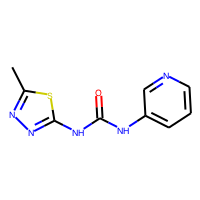
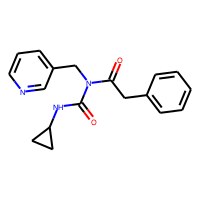
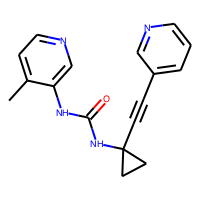
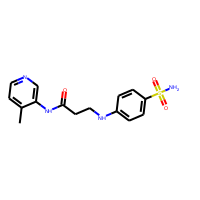
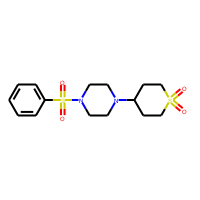
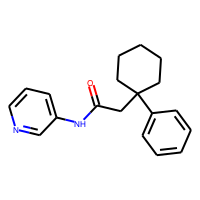
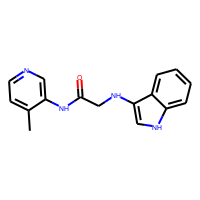
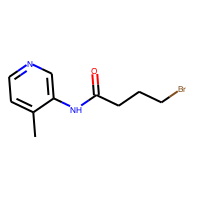
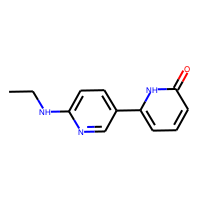
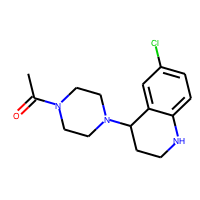
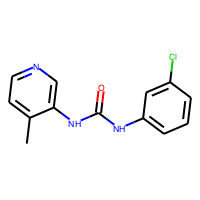
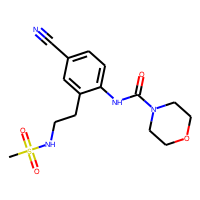
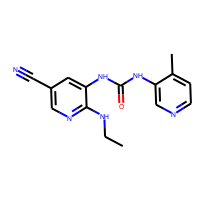
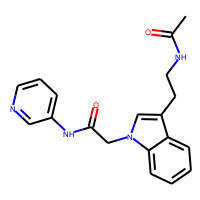
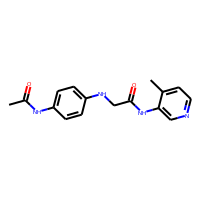
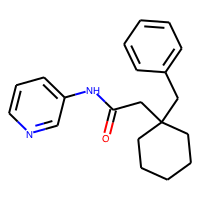
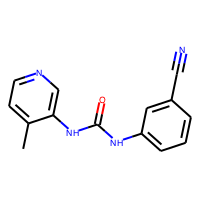
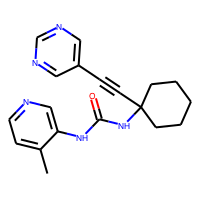
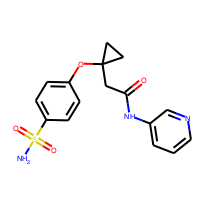
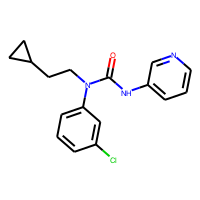
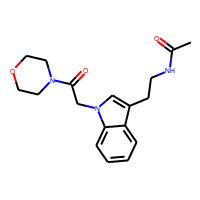
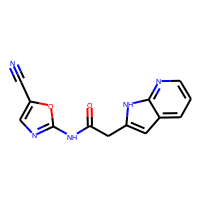
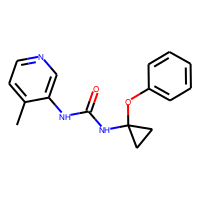
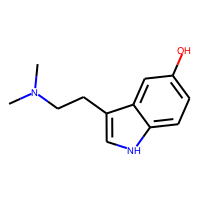
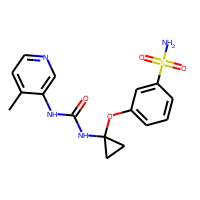
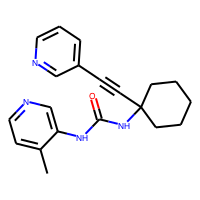
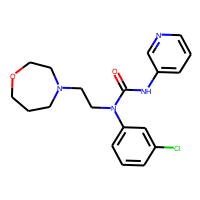
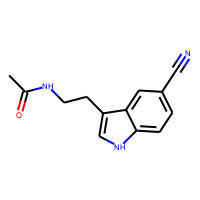
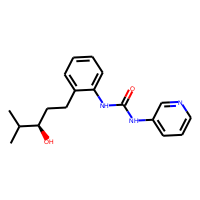
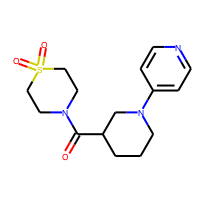
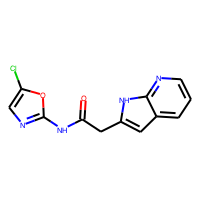
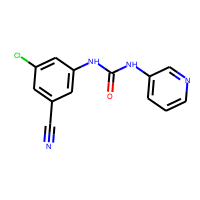
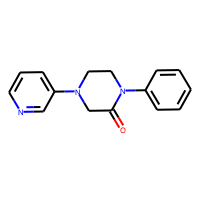
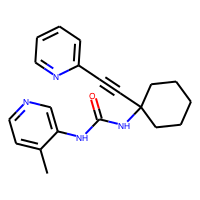
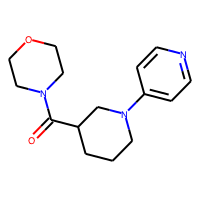
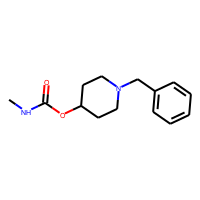
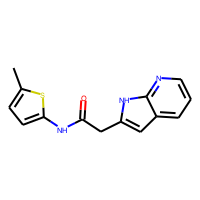
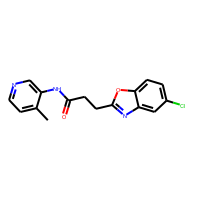
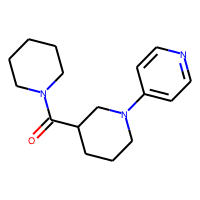
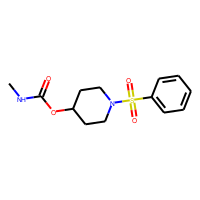
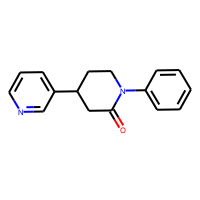
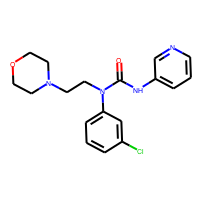
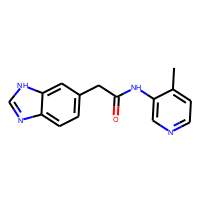
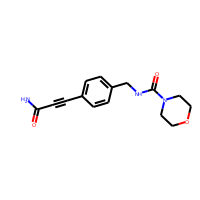
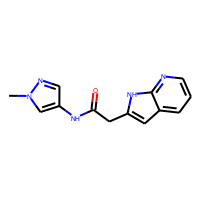
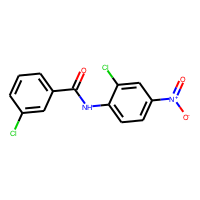
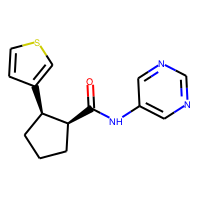
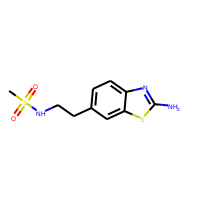
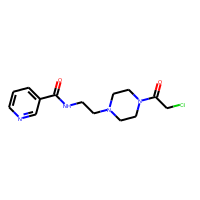
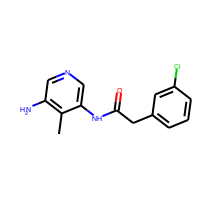
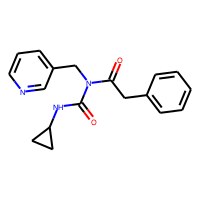
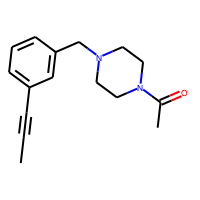
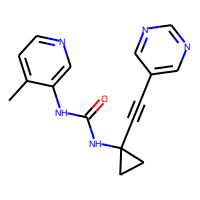
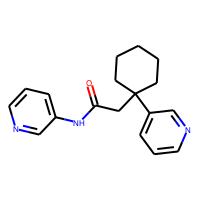
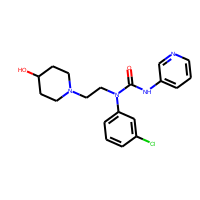
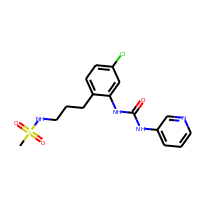
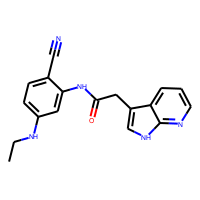
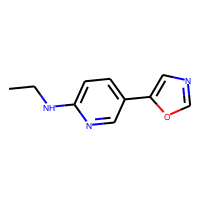
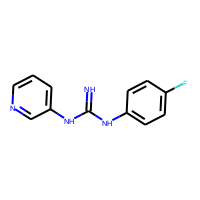
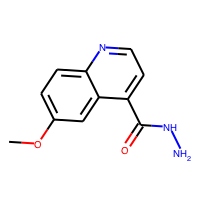

In [102]:
sa_df

In [103]:
cols = sa_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('ROMol')))
sa_df = sa_df.reindex(columns= cols)

,ROMol,SMILES,MW,SCORE,BB,CID,LINK,ROUTE
0,,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,0.979,"[EN300-17271, EN300-21243]",ALE-HEI-f28-4,https://covid.postera.ai/covid/submissions/f28...,https://htmlpreview.github.io/?https://github....
1,,O=C(Cc1ccccc1)N(Cc1cccnc1)C(=O)NC1CC1,309.147727,0.812,"[EN300-15619, EN300-18992]",MIC-SGC-657-1,https://covid.postera.ai/covid/submissions/657...,https://htmlpreview.github.io/?https://github....
2,,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,0.973,[EN300-51191],CHR-SOS-6c4-11,https://covid.postera.ai/covid/submissions/6c4...,https://htmlpreview.github.io/?https://github....
3,,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,0.681,[EN300-51191],GAB-REV-70c-3,https://covid.postera.ai/covid/submissions/70c...,https://htmlpreview.github.io/?https://github....
4,,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.940,"[EN300-31943, EN300-42287]",GIA-UNK-eaa-2,https://covid.postera.ai/covid/submissions/eaa...,https://htmlpreview.github.io/?https://github....
5,,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,0.943,"[EN300-52411, EN300-21243]",CHR-SOS-f73-1,https://covid.postera.ai/covid/submissions/f73...,https://htmlpreview.github.io/?https://github....
6,,Cc1ccncc1NC(=O)CNc1c[nH]c2ccccc12,280.132411,0.498,[EN300-65474],GAB-REV-70c-17,https://covid.postera.ai/covid/submissions/70c...,https://htmlpreview.github.io/?https://github....
7,,Cc1ccncc1NC(=O)CCCBr,256.021125,0.943,"[EN300-20415, EN300-51191]",ALE-HEI-f28-12,https://covid.postera.ai/covid/submissions/f28...,https://htmlpreview.github.io/?https://github....
8,,CCNc1ccc(-c2cccc(=O)[nH]2)cn1,215.105862,0.926,[EN300-109418],ANN-UNI-263-1,https://covid.postera.ai/covid/submissions/263...,https://htmlpreview.github.io/?https://github....
9,,CC(=O)N1CCN(C2CCNc3ccc(Cl)cc32)CC1,293.129490,0.926,"[EN300-80438, EN300-33920]",KIM-UNI-7d1-4,https://covid.postera.ai/covid/submissions/7d1...,https://htmlpreview.github.io/?https://github....

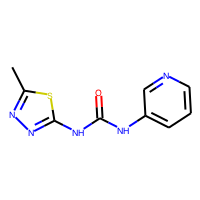
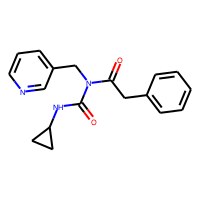
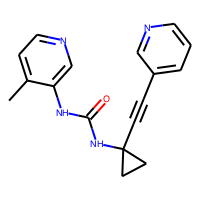
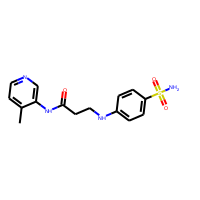
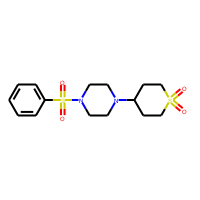
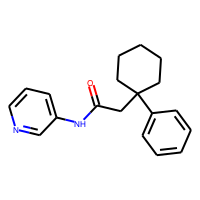
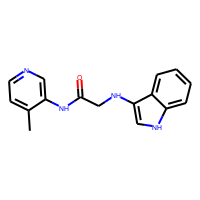
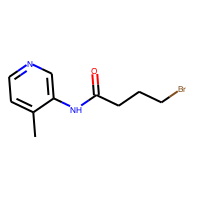
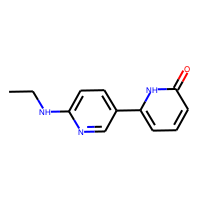
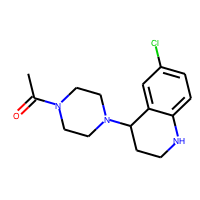
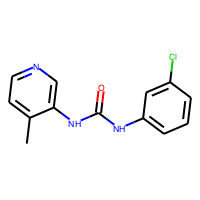
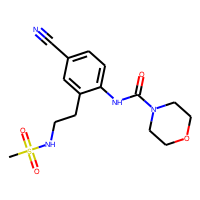
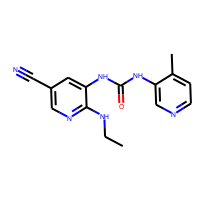
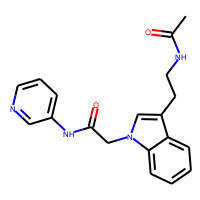
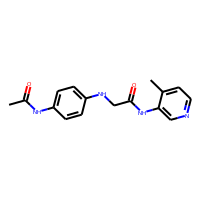
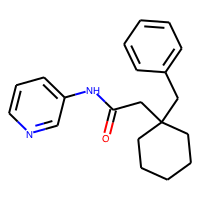
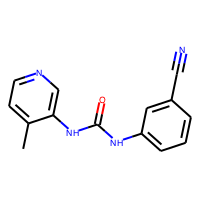
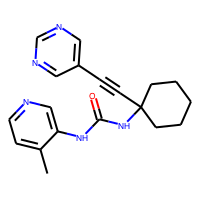
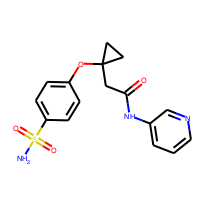
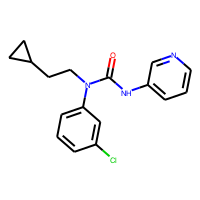
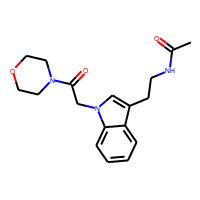
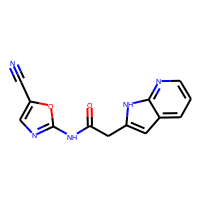
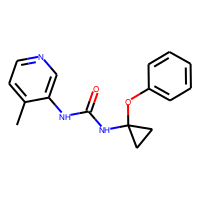
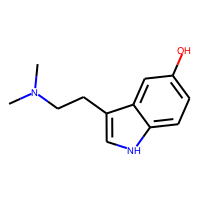
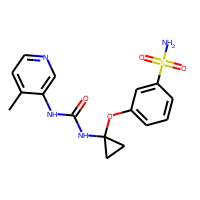
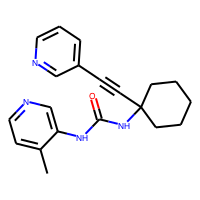
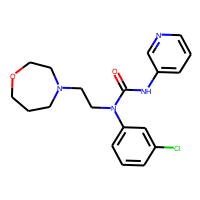
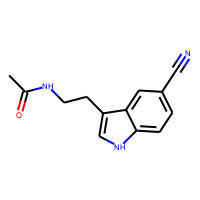
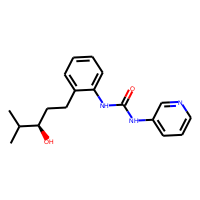
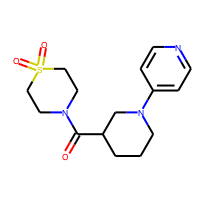
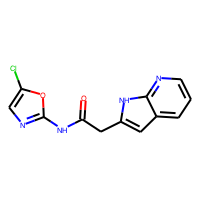
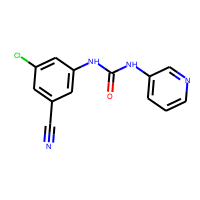
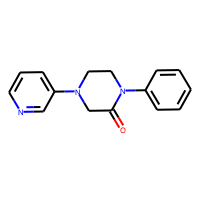
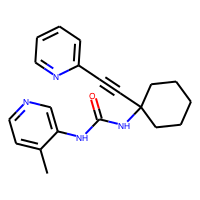
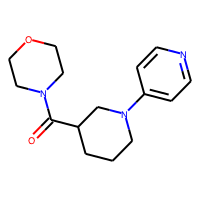
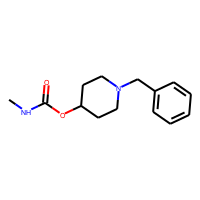
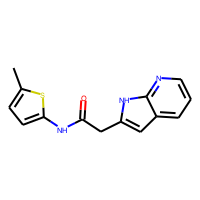
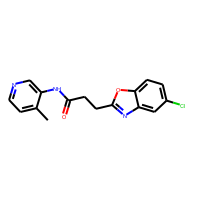
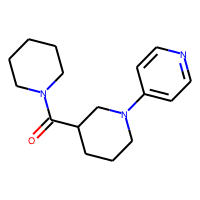
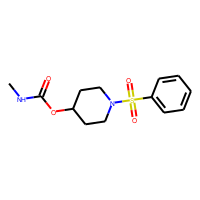
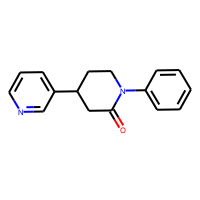
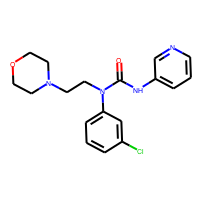
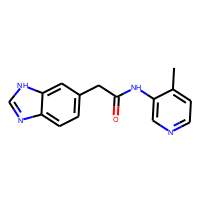
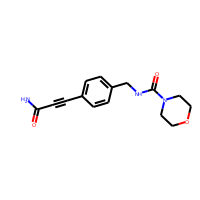
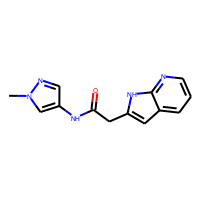
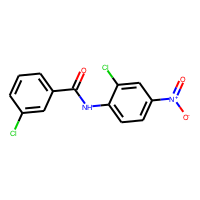
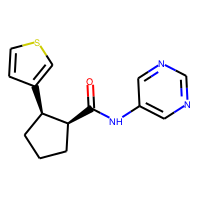
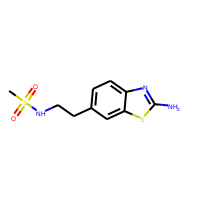
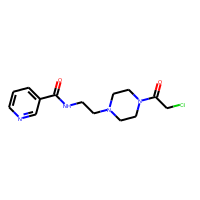
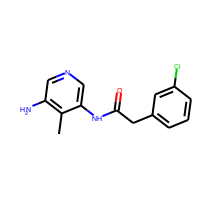
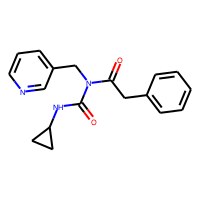
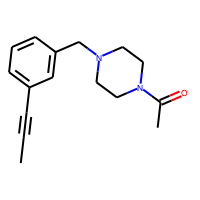
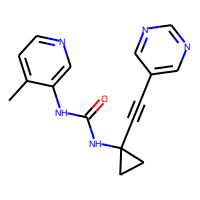
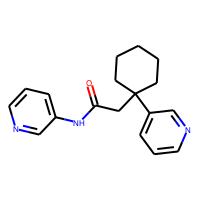
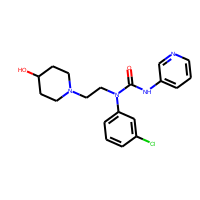
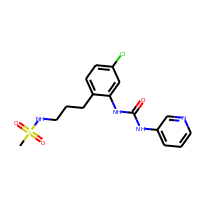
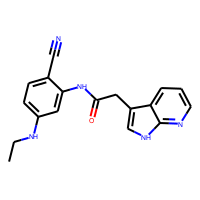
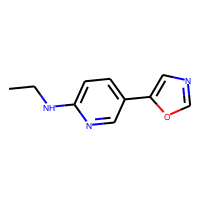
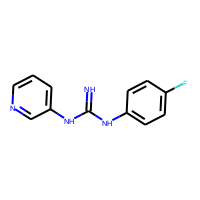
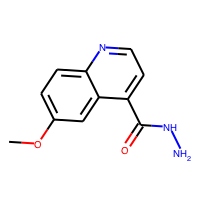

In [104]:
sa_df

In [105]:
alpha_df = pd.read_csv('alpha_covid_sa_comments.csv')
alpha_df.head()

,Compound ID,Building blocks avaliablity from Enamine,AAL Comments,Enamine Yes/No
0,ALE-HEI-f28-1,Yes,NaN,NaN
1,ALE-HEI-f28-2,Yes,NaN,NaN
2,ALE-HEI-f28-4,Yes,NaN,NaN
3,ALE-HEI-f28-5,Yes,NaN,NaN
4,ALE-HEI-f28-12,Yes,NaN,NaN


In [107]:
alpha_ids_list = list(alpha_df['Compound ID'])
alpha_ids_list

['ALE-HEI-f28-1',
 'ALE-HEI-f28-2',
 'ALE-HEI-f28-4',
 'ALE-HEI-f28-5',
 'ALE-HEI-f28-12',
 'ALE-HEI-f28-13',
 'ALE-HEI-f28-14',
 'ALE-HEI-f28-15',
 'AMD-U.A-3d2-1',
 'ANN-UNI-263-1',
 'NN-UNI-263-5',
 'ANT-DIA-3c7-1',
 'ANT-DIA-3c7-3',
 'ANT-DIA-3c7-5',
 'ANT-DIA-045-3',
 'ANT-DIA-b7f-6',
 'BAR-COM-569-2',
 'BAR-COM-569-3',
 'CHR-SOS-1f3-10',
 'CHR-SOS-1f3-11',
 'CHR-SOS-1f3-12',
 'CHR-SOS-6c4-1',
 'CHR-SOS-6c4-2',
 'CHR-SOS-6c4-3',
 'CHR-SOS-6c4-4',
 'CHR-SOS-6c4-5',
 'CHR-SOS-6c4-6',
 'CHR-SOS-6c4-7',
 'CHR-SOS-6c4-8',
 'CHR-SOS-6c4-9',
 'CHR-SOS-6c4-10',
 'CHR-SOS-6c4-11',
 'CHR-SOS-6c4-12',
 'CHR-SOS-6c4-13',
 'CHR-SOS-6c4-14',
 'CHR-SOS-6c4-15',
 'CHR-SOS-6c4-16',
 'CHR-SOS-363-1',
 'CHR-SOS-363-2',
 'CHR-SOS-709-2',
 'CHR-SOS-709-3',
 'CHR-SOS-709-5',
 'CHR-SOS-709-10',
 'CHR-SOS-709-14',
 'CHR-SOS-709-21',
 'CHR-SOS-f73-1',
 'CHR-SOS-f73-2',
 'CHR-SOS-f73-3',
 'CHR-SOS-f73-4',
 'CHR-SOS-f73-5',
 'ELE-IMP-dfb-3',
 'ELE-IMP-dfb-4',
 'GAB-FAC-0d2-1',
 'GAB-FAC-880-1',
 'GAB-FAC-da

In [110]:
sa_df = pd.concat([sa_df.loc[sa_df['CID'].isin(alpha_ids_list)],
           sa_df.loc[~sa_df['CID'].isin(alpha_ids_list)]]).reset_index(drop=True)

,ROMol,SMILES,MW,SCORE,BB,CID,LINK,ROUTE
0,,Cc1nnc(NC(=O)Nc2cccnc2)s1,235.052781,0.979,"[EN300-17271, EN300-21243]",ALE-HEI-f28-4,https://covid.postera.ai/covid/submissions/f28...,https://htmlpreview.github.io/?https://github....
1,,Cc1ccncc1NC(=O)NC1(C#Cc2cccnc2)CC1,292.132411,0.973,[EN300-51191],CHR-SOS-6c4-11,https://covid.postera.ai/covid/submissions/6c4...,https://htmlpreview.github.io/?https://github....
2,,Cc1ccncc1NC(=O)CCNc1ccc(S(N)(=O)=O)cc1,334.109961,0.681,[EN300-51191],GAB-REV-70c-3,https://covid.postera.ai/covid/submissions/70c...,https://htmlpreview.github.io/?https://github....
3,,O=S1(=O)CCC(N2CCN(S(=O)(=O)c3ccccc3)CC2)CC1,358.102099,0.940,"[EN300-31943, EN300-42287]",GIA-UNK-eaa-2,https://covid.postera.ai/covid/submissions/eaa...,https://htmlpreview.github.io/?https://github....
4,,O=C(CC1(c2ccccc2)CCCCC1)Nc1cccnc1,294.173213,0.943,"[EN300-52411, EN300-21243]",CHR-SOS-f73-1,https://covid.postera.ai/covid/submissions/f73...,https://htmlpreview.github.io/?https://github....
5,,Cc1ccncc1NC(=O)CNc1c[nH]c2ccccc12,280.132411,0.498,[EN300-65474],GAB-REV-70c-17,https://covid.postera.ai/covid/submissions/70c...,https://htmlpreview.github.io/?https://github....
6,,Cc1ccncc1NC(=O)CCCBr,256.021125,0.943,"[EN300-20415, EN300-51191]",ALE-HEI-f28-12,https://covid.postera.ai/covid/submissions/f28...,https://htmlpreview.github.io/?https://github....
7,,CCNc1ccc(-c2cccc(=O)[nH]2)cn1,215.105862,0.926,[EN300-109418],ANN-UNI-263-1,https://covid.postera.ai/covid/submissions/263...,https://htmlpreview.github.io/?https://github....
8,,Cc1ccncc1NC(=O)Nc1cccc(Cl)c1,261.066890,0.945,"[EN300-18057, EN300-51191]",TRY-UNI-714-12,https://covid.postera.ai/covid/submissions/714...,https://htmlpreview.github.io/?https://github....
9,,CCNc1ncc(C#N)cc1NC(=O)Nc1cnccc1C,296.138559,0.942,[EN300-155041],TRY-UNI-1fd-2,https://covid.postera.ai/covid/submissions/1fd...,https://htmlpreview.github.io/?https://github....

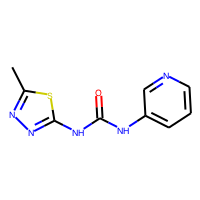
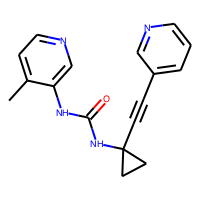
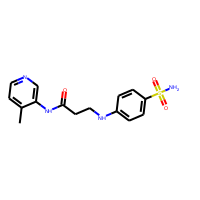
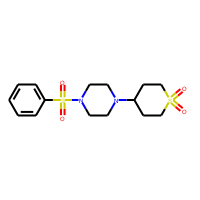
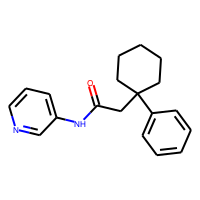
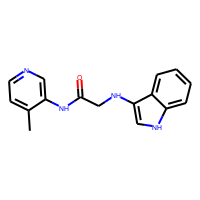
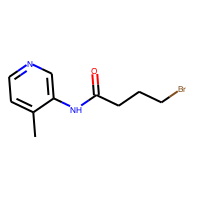
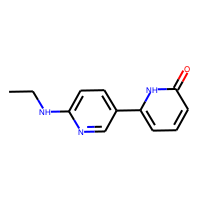
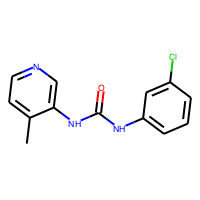
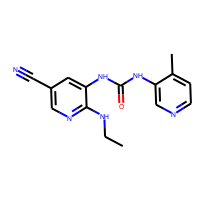
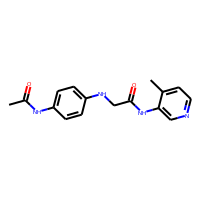
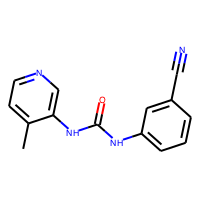
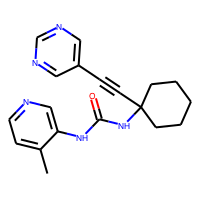
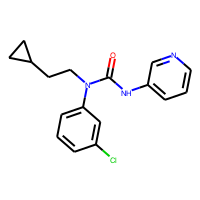
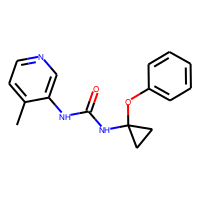
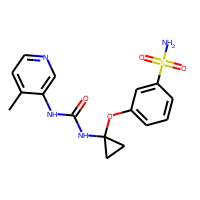
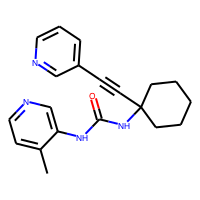
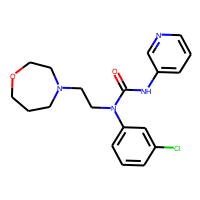
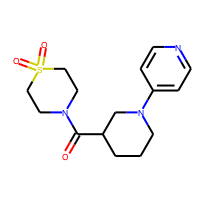
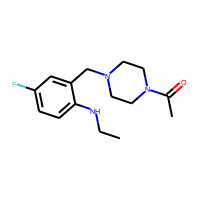
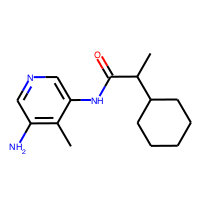
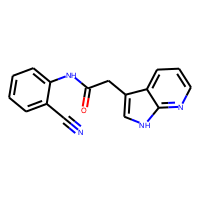
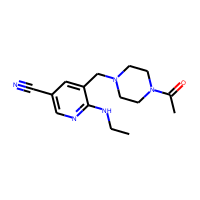
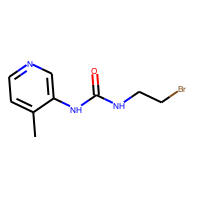
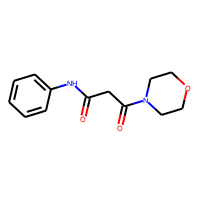
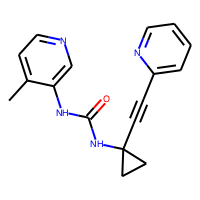
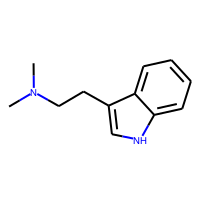
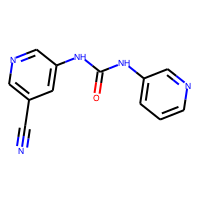
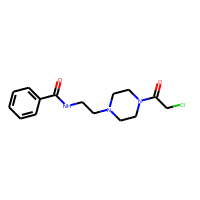
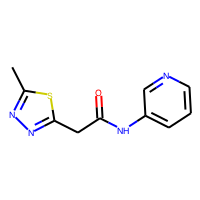
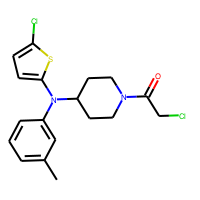
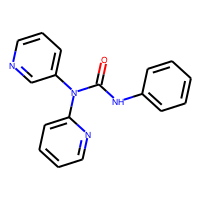
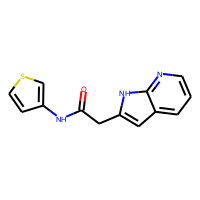
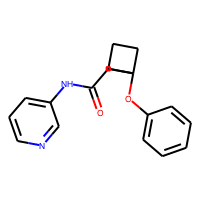
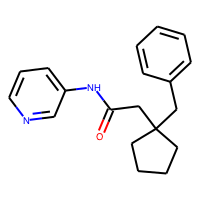
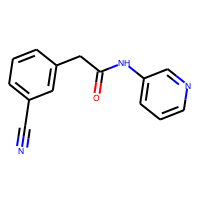
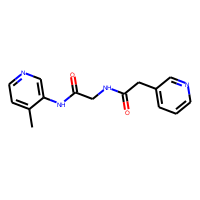
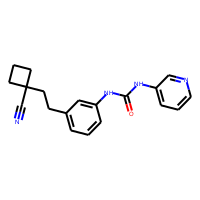
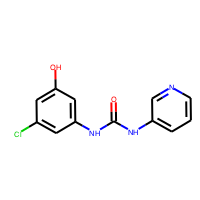
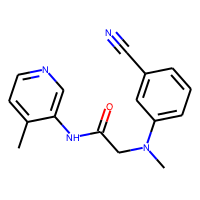
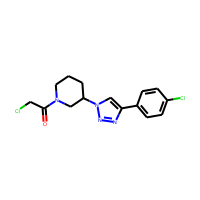
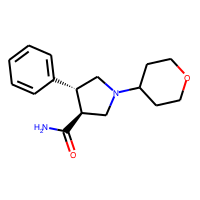
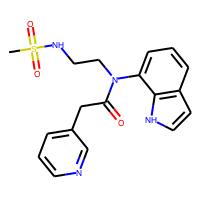
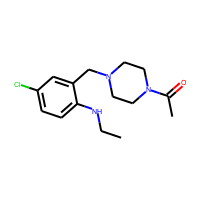
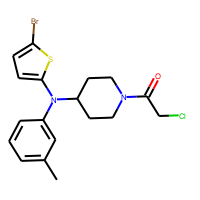
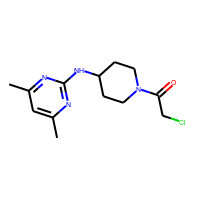
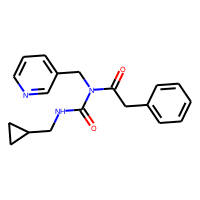
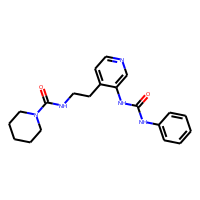
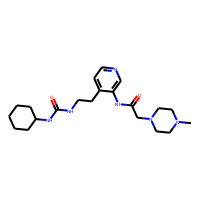
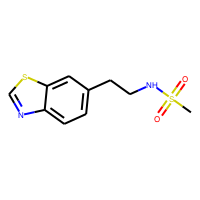
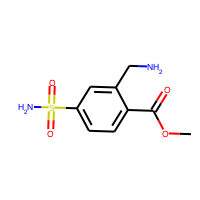
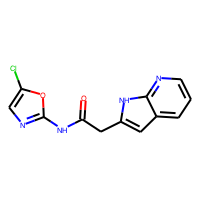
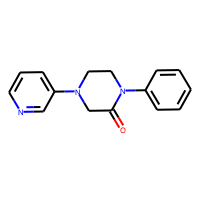
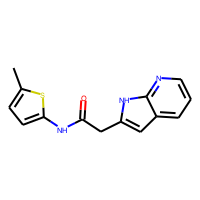
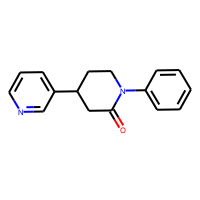
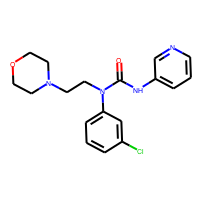
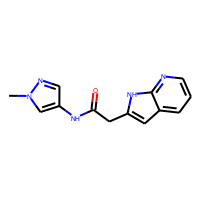
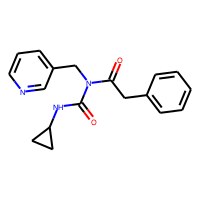
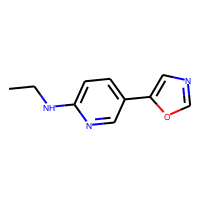
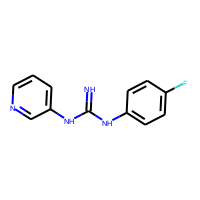

In [111]:
sa_df

In [112]:
Chem.PandasTools.SaveXlsxFromFrame(sa_df, 'covid_SA_file.xlsx', size=(100, 100))

In [113]:
new_df = pd.read_excel('./covid_SA_file.xlsx')

In [115]:
new_df['logP'] = new_df['SMILES'].apply(lambda x: Chem.Descriptors.MolLogP(Chem.MolFromSmiles(x)))

In [117]:
new_df.to_csv('logP.csv')